# Building ML models
We start with linear regression model to predict a company's finances for 2022.

But first let's just have a look at some plots for all the companies' revenue of the years.

In [1]:
from textwrap import shorten

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df_processed = pd.read_csv('data/5_processed.csv', index_col=0)

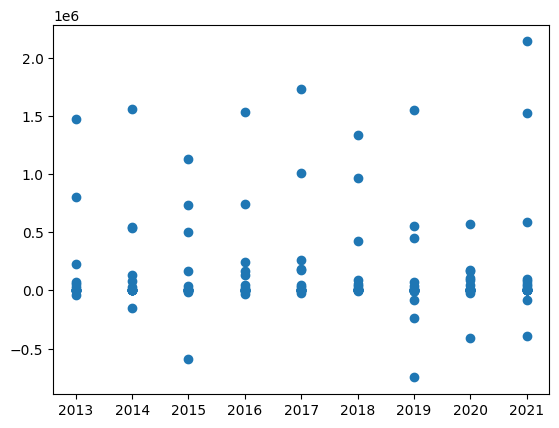

In [3]:
finances = df_processed.loc[:, '2021':'2013']
finances.drop('Novo Nordisk', inplace=True) # outlier
X = finances.columns.astype(int)
y = [finances.loc[i] for i in finances.index]
plt.scatter([X]*len(finances), y)

The only trend is that time moves forward.

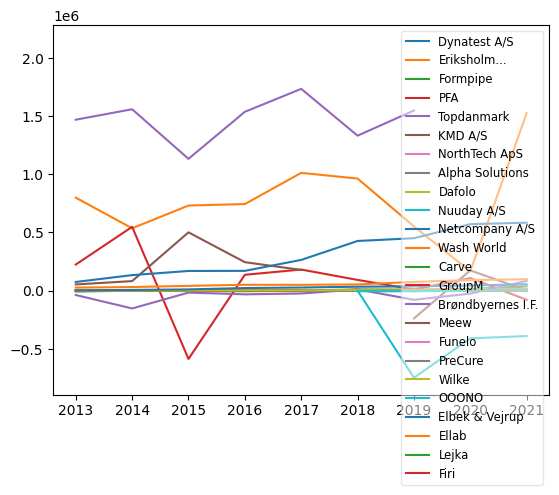

In [4]:
for i in finances.index:
    plt.plot(X, finances.loc[i], label=shorten(i, width=20, placeholder='...'))
plt.legend(loc='upper right', fontsize='small', fancybox=True, framealpha=0.5)
plt.show()

Because companies vary wildly in their finances, both in terms of the company's size and also their structure and strategy within a larger organization, we will build a model for the individual company.

What I mean by different finance strategy is that some companies report 0 net profits presumably because they send the money to a parent company. Other companies have 0 gross because their purpose is not to make money. As a result, some companies seemingly report wild losses as the end result.

I don't know finances at all. But that's a lot of companies making close to 0 or negative money.

Now let's try building a linear regression model.

In [5]:
def build_projected_profit_model(company):
    finances = df_processed.loc[company, '2021':'2013']         # get the finances for the company
    X = finances.index.astype(int).to_numpy().reshape(-1, 1)    # Xs are the year labels
    y = finances
    model = LinearRegression().fit(X, y)
    plt.plot(X, y, label=company)
    plt.plot(X, model.predict(X), label=f'{company} projected')
    plt.legend()
    plt.show()
    return model

Let's use **Novo Nordisk** as an example because they seem to have stable finances that don't look weird. Their financial data also goes back all the way to 2013. That is the case with all but 2 companies so far.

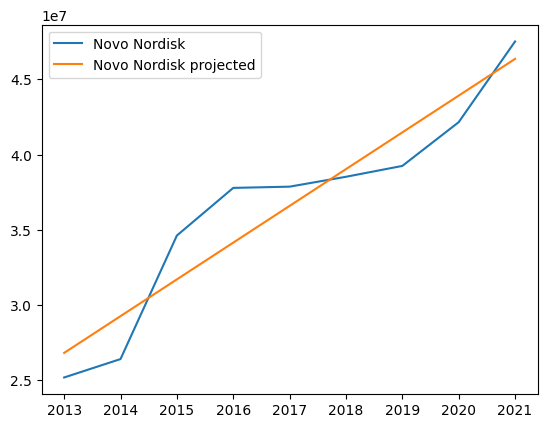

In [6]:
novo_model = build_projected_profit_model('Novo Nordisk')

And now, let's predict a profit for **2022**.

In [7]:
novo_2022 = novo_model.predict(np.array([2022]).reshape(-1, 1))
novo_2022[0]

48808805.55555534

I don't think we can assess the accuracy at all because we did not split training data. We chose not to because we already have insanely little data to train on. As a result, we have no test data with which to assess the accuracy of the model.